<a href="https://colab.research.google.com/github/cicaco07/PCVK-2023/blob/main/Kuis2_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KUIS 2
## Kelompok 6
### Aldin Ariel Pramudya (2141720233)
### Aryo Deva Saputra (2141720176)
### Muhammad Ega Rama Fernanda (2141720143)
Kelas : 3D

Prodi : D-IV Teknik Inormatika

Jurusan : Teknologi Inormasi

Politeknik Negeri Malang

Soal :
1. Kumpulkan e-ktp anggota keluarga pada kelompok minimal 10 buah sebagai dataset.
2. deteksi dan kenali foto wajah e-ktp tersebut menggunakan metode yang telah dipelajari baik pada matakulilah PCVK ataupun matakuliah lain pada semester ini.
3. Presentasikan di depan kelas hasil dari pekerjaan kelompok Anda, paparkan hasil dari pekerjaan tersebut secara detail lengkap dengan tangkapan layar bagian dari :
  - pre-processing
  - lokalisasi
  - segmentasi
  - pengenalan.

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

# **Aryo Deva Saputra**
## **Gambar ktp_4**
## **Pre-processing**

In [65]:
# Load the image
img = cv2.imread('/content/drive/MyDrive/PCVK/datasetktpkuis2/ktp_4.jpg')

# Convert the image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Otsu's thresholding with adjusted parameters
_, otsu_thresholded = cv2.threshold(img_gray, 90, 255, cv2.THRESH_BINARY)

## **Lokalisasi dan Segmentasi**

In [66]:
# Find contours
contours, hierarchy = cv2.findContours(otsu_thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Draw contours on the original image
contour_img = img.copy()
cv2.drawContours(contour_img, contours, -1, (0, 0, 255), 3)

array([[[44, 25, 20],
        [43, 27, 21],
        [43, 26, 23],
        ...,
        [50, 39, 42],
        [52, 38, 42],
        [52, 38, 42]],

       [[44, 25, 20],
        [43, 27, 21],
        [41, 26, 23],
        ...,
        [50, 39, 42],
        [51, 37, 41],
        [51, 37, 41]],

       [[42, 25, 22],
        [43, 26, 23],
        [41, 26, 23],
        ...,
        [50, 39, 42],
        [50, 39, 42],
        [49, 38, 41]],

       ...,

       [[ 7,  9, 10],
        [ 7,  9, 10],
        [ 7,  9, 10],
        ...,
        [34, 33, 29],
        [39, 38, 34],
        [46, 45, 41]],

       [[ 7,  8, 12],
        [ 7,  8, 12],
        [ 7,  8, 12],
        ...,
        [35, 34, 30],
        [43, 42, 38],
        [51, 50, 46]],

       [[ 6,  7, 11],
        [ 7,  8, 12],
        [ 7,  8, 12],
        ...,
        [35, 34, 30],
        [44, 43, 39],
        [54, 53, 49]]], dtype=uint8)

## **Hasil Cropping**

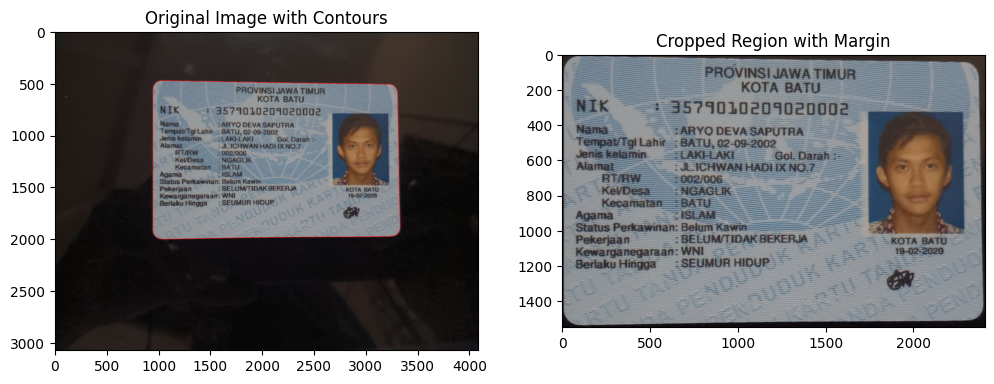

In [67]:
# Display the original image with contours
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.title('Original Image with Contours')

# Crop and display each contour with a margin
margin = 10  # Adjust the margin as needed

for contour in contours:
    # Get bounding box coordinates
    x, y, w, h = cv2.boundingRect(contour)

    # Add a margin to the bounding box
    x -= margin
    y -= margin
    w += 2 * margin
    h += 2 * margin

    # Ensure coordinates are within the image boundaries
    x = max(0, x)
    y = max(0, y)
    w = min(w, img.shape[1] - x)
    h = min(h, img.shape[0] - y)

    # Crop the region of interest
    cropped_region = img[y:y+h, x:x+w]

    # Display the cropped region
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(cropped_region, cv2.COLOR_BGR2RGB))
    plt.title('Cropped Region with Margin')
    plt.show()


## **Face Detection**

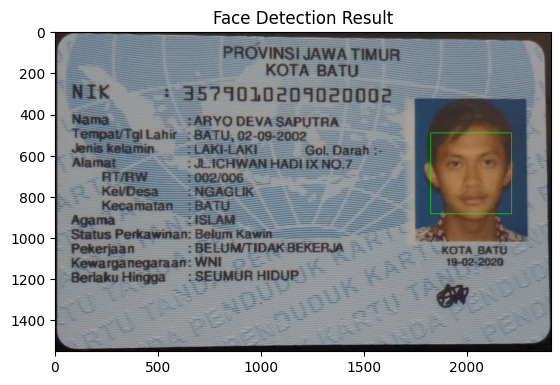

In [68]:
import cv2
import matplotlib.pyplot as plt

# Load cascade classifier
cascade_wajah = cv2.CascadeClassifier('/content/drive/MyDrive/PCVK/face/haarcascade_frontalface_alt.xml')

# Panggil fungsi face_detection jika ada objek KTP terdeteksi
if np.any(cropped_region):
    # Convert cropped_region to grayscale
    cropped_gray = cv2.cvtColor(cropped_region, cv2.COLOR_BGR2GRAY)

    # Face detection
    faces = cascade_wajah.detectMultiScale(cropped_gray, scaleFactor=1.3, minNeighbors=5, minSize=(20, 20))

    # Draw rectangles around the detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(cropped_region, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Display the result
    plt.imshow(cv2.cvtColor(cropped_region, cv2.COLOR_BGR2RGB))
    plt.title('Face Detection Result')
    plt.show()


## **Gambar ktp_5 & ktp_6**

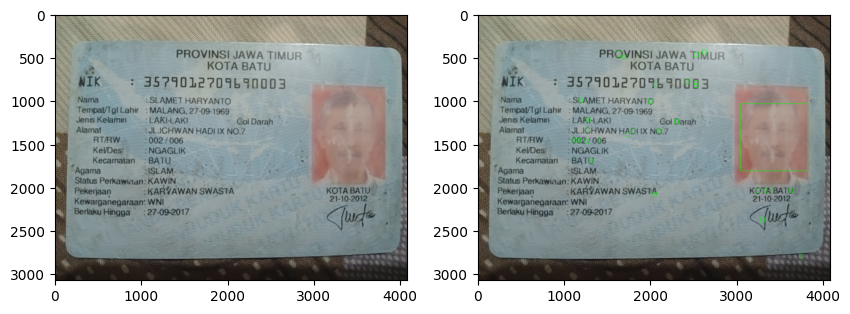

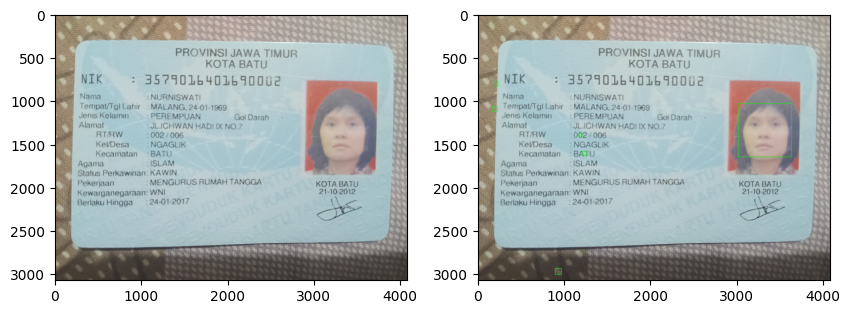

In [81]:
import cv2 as cv

def face_detection(image_path):
    img = cv.imread(image_path)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    faces = cascade_wajah.detectMultiScale(gray)

    for (x, y, w, h) in faces:
        cv.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)

    plt.figure(figsize=(10, 10))
    plt.subplot(121), plt.imshow(cv.cvtColor(cv.imread(image_path), cv.COLOR_BGR2RGB))
    plt.subplot(122), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.show()


image_paths = [
    '/content/drive/MyDrive/PCVK/datasetktpkuis2/ktp_5.jpg',
    '/content/drive/MyDrive/PCVK/datasetktpkuis2/ktp_6.jpg',
]

cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/face/haarcascade_frontalface_alt.xml')

for image_path in image_paths:
    face_detection(image_path)

# **Aldin Ariel Pramudya**
## **Gambar ktp_1**

In [69]:
img = cv2.imread('/content/drive/MyDrive/PCVK/datasetktpkuis2/ktp_1_double.jpg')
img_original = np.copy(img)

# Apply Gaussian Blur
blurred_img = cv2.GaussianBlur(img_original, (5, 5), 0.5)

# Apply Erosion
kernel_erosion = np.ones((3, 3), np.uint8)
eroded_img = cv2.erode(blurred_img, kernel_erosion, iterations=1)

# Apply Dilation
kernel_dilation = np.ones((5, 5), np.uint8)
dilated_img = cv2.dilate(eroded_img, kernel_dilation, iterations=10)

# Apply Opening (Erosion followed by Dilation)
kernel_opening = np.ones((5, 5), np.uint8)
opening_img = cv2.morphologyEx(dilated_img, cv2.MORPH_OPEN, kernel_opening)

gray = cv2.cvtColor(opening_img, cv2.COLOR_BGR2GRAY)

# Otsu Thresholding
_, otsu_thresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


In [70]:
# Lokalisasi (Canny)
edged = cv2.Canny(otsu_thresholded, 50, 150)

In [71]:
# Segmentasi

def biggest_contour(contours):
    biggest = np.array([])
    max_area = 0
    for i in contours:
        area = cv2.contourArea(i)
        if area > 1000:
            peri = cv2.arcLength(i, True)
            approx = cv2.approxPolyDP(i, 0.015 * peri, True)
            if area > max_area and len(approx) == 4:
                biggest = approx
                max_area = area
    return biggest

contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
biggest = biggest_contour(contours)
cv2.drawContours(img, [biggest], -1, (0, 255, 0), 3)

# Warp Prespective
points = biggest.reshape(4, 2)
input_points = np.zeros((4, 2), dtype="float32")

points_sum = points.sum(axis=1)
input_points[0] = points[np.argmin(points_sum)]
input_points[3] = points[np.argmax(points_sum)]

points_diff = np.diff(points, axis=1)
input_points[1] = points[np.argmin(points_diff)]
input_points[2] = points[np.argmax(points_diff)]

(top_left, top_right, bottom_right, bottom_left) = input_points
bottom_width = np.sqrt(((bottom_right[0] - bottom_left[0]) ** 2) + ((bottom_right[1] - bottom_left[1]) ** 2))
top_width = np.sqrt(((top_right[0] - top_left[0]) ** 2) + ((top_right[1] - top_left[1]) ** 2))
right_height = np.sqrt(((top_right[0] - bottom_right[0]) ** 2) + ((top_right[1] - bottom_right[1]) ** 2))
left_height = np.sqrt(((top_left[0] - bottom_left[0]) ** 2) + ((top_left[1] - bottom_left[1]) ** 2))

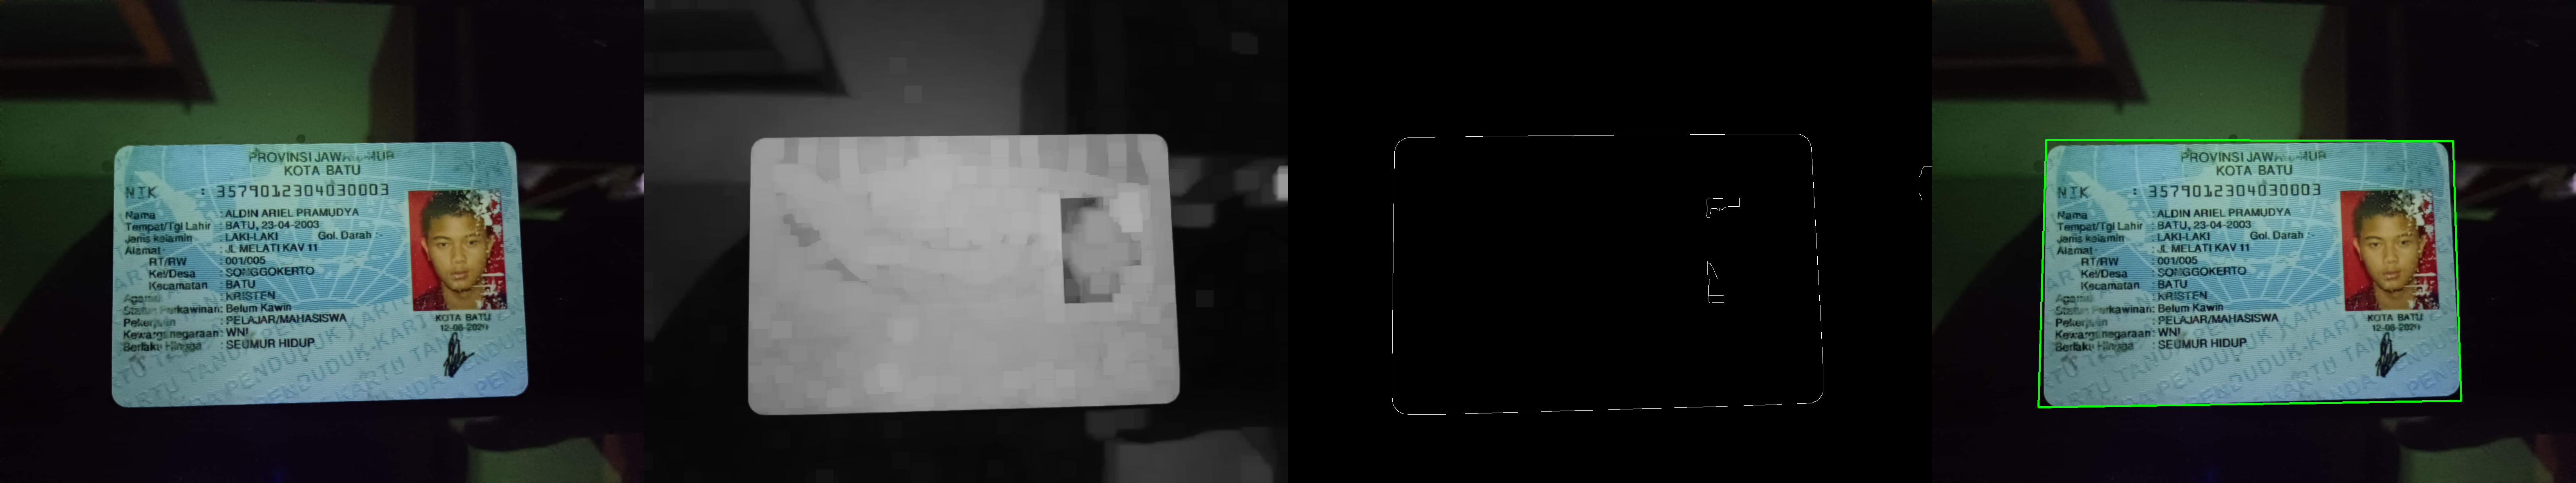

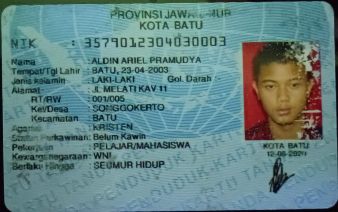

In [72]:
# Output gambar setelah Warp Prespective
ktp_width = 8.6  # Lebar KTP dalam cm
ktp_height = 5.4  # Tinggi KTP dalam cm

max_width = int(ktp_width * 100 / 2.54)
max_height = int(ktp_height * 100 / 2.54)

# Desired points values in the output image
converted_points = np.float32([[0, 0], [max_width, 0], [0, max_height], [max_width, max_height]])

# Perspective transformation
matrix = cv2.getPerspectiveTransform(input_points, converted_points)
img_output = cv2.warpPerspective(img_original, matrix, (max_width, max_height))

# Image shape modification for hstack
gray = np.stack((gray,) * 3, axis=-1)
edged = np.stack((edged,) * 3, axis=-1)

img_hor = np.hstack((img_original, gray, edged, img))
cv2_imshow(img_hor)
cv2_imshow(img_output)

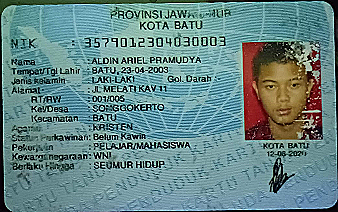

In [73]:
# Sharpening

kernel_sharpen = np.array([[0,-1,0],
                          [-1,5,-1],
                          [0,-1,0]])

def convolution2d(image, kernel):
    return cv2.filter2D(image, -1, kernel)

result = np.copy(img_output)
ktp_filtered = convolution2d(result, kernel_sharpen)
cv2_imshow(ktp_filtered)

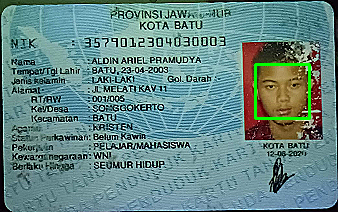

In [74]:
# Tahap Deteksi
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/PCVK/face/haarcascade_frontalface_alt.xml')
detect = np.copy(ktp_filtered)
gray = cv2.cvtColor(detect, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(20, 20))

for (x, y, w, h) in faces:
    cv2.rectangle(detect, (x, y), (x+w, y+h), (0, 255, 0), 2)

cv2_imshow(detect)

## **Gambar ktp_2**

Text(0.5, 1.0, 'Original Image')

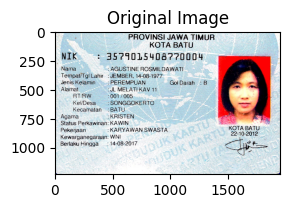

In [75]:
img = cv2.imread('/content/drive/MyDrive/PCVK/datasetktpkuis2/ktp_2.jpg')
img_original = np.copy(img)

plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

Text(0.5, 1.0, 'KTP Face Detection')

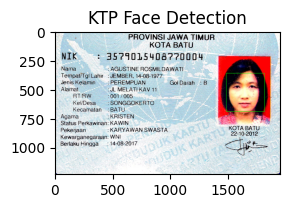

In [76]:
# Tahap Deteksi
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/PCVK/face/haarcascade_frontalface_alt.xml')
detect = np.copy(img_original)
gray = cv2.cvtColor(detect, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5, minSize=(20, 20))

for (x, y, w, h) in faces:
    cv2.rectangle(detect, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.subplot(121), plt.imshow(cv2.cvtColor(detect, cv2.COLOR_BGR2RGB))
plt.title('KTP Face Detection')

## **Gambar ktp_9**

In [77]:
img = cv2.imread('/content/drive/MyDrive/PCVK/datasetktpkuis2/ktp_9.jpg')
img_original = np.copy(img)

Text(0.5, 1.0, 'Sharpened KTP')

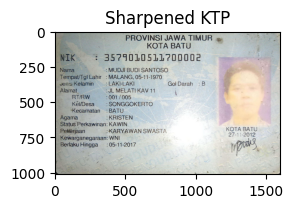

In [78]:
kernel_sharpen = np.array([[0,-1,0],
                          [-1,5,-1],
                          [0,-1,0]])

def convolution2d(image, kernel):
    return cv2.filter2D(image, -1, kernel)

ktp_filtered = convolution2d(img_original, kernel_sharpen)
plt.subplot(121), plt.imshow(cv2.cvtColor(ktp_filtered, cv2.COLOR_BGR2RGB))
plt.title('Sharpened KTP')

Text(0.5, 1.0, 'KTP Face Detection')

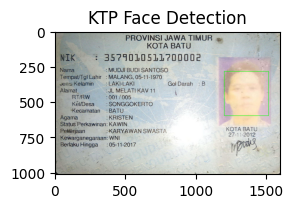

In [79]:
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/PCVK/face/haarcascade_frontalface_alt.xml')
detect = np.copy(ktp_filtered)
gray = cv2.cvtColor(detect, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5, minSize=(20, 20))

for (x, y, w, h) in faces:
    cv2.rectangle(detect, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.subplot(121), plt.imshow(cv2.cvtColor(detect, cv2.COLOR_BGR2RGB))
plt.title('KTP Face Detection')

# **Muhammad Ega Rama Fernanda**
## **Gambar ktp_1**